In [26]:
from google.colab import files
uploaded = files.upload()


Saving amazon_sales_dataset.csv.zip to amazon_sales_dataset.csv.zip


In [11]:
uploaded.keys()


NameError: name 'uploaded' is not defined

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("amazon_sales_dataset.csv.zip")
df.head(9)




FileNotFoundError: [Errno 2] No such file or directory: 'amazon_sales_dataset.csv.zip'

In [ ]:
df.shape



NameError: name 'df' is not defined

In [ ]:
df.columns

In [ ]:
df.isnull().sum()


In [ ]:
df = df.drop(columns=['Unnamed: 3'])


In [ ]:
df.shape


In [ ]:
df.duplicated().sum()


In [ ]:
print("Total unique stores:", df['Store'].nunique())
print("Total unique departments:", df['Dept'].nunique())
print("Year range:", df['Year'].min(), "to", df['Year'].max())


In [ ]:
df.describe()


 )
# Store	Unique store number (1–45)	Total 45 stores. Mean = 22.3 → Data covers multiple store branches.
# Dept	Department number (1–99)	Total 99 departments. Departments vary in performance.
#Weekly_Sales	Weekly total sales for each store and department	Mean = 13,058. Sales range from ₹0 → ₹72,756 → large variation between stores/weeks.
#Size	Store size in square feet	Range: 34,875 → 219,622 sq. ft. → mixture of small and large stores.
#Temperature	Average weekly temperature (°F)	Range: 14 → 100°F → data collected from different climate regions/seasons.
#Fuel_Price	Weekly fuel price in the region	Range: 2.47 → 4.46, Avg = 3.35 → useful to see if fuel price affects shopping behavior.
#CPI (Consumer Price Index)	Measures inflation and price level	Range: 126 → 227 → helps analyze inflation effect on sales.
#Unemployment	Unemployment rate (%)	Range: 3.8% → 12.1% → can be used to test if higher unemployment lowers sales.
#IsHoliday	1 = Holiday week, 0 = Non-holiday	Mean = 0.06 → Only ~6% of data are holiday weeks, but likely with higher sales.
#Year	Year of the record	Range: 2019 → 2021 → dataset covers 3 years of data.
#Month	Month of the year (1–12)	Helps identify seasonal trends and monthly performance.
#Week	Week number of the year (1–52)	Useful for weekly trend or forecasting analysis.
#max / min / mean / median / std	Pre-calculated statistical values for each record	These columns may not be needed — verify if they were added earlier during aggregation.
# Total_MarkDown	Total discount or markdown value given that week	Mean = ₹4,791 → markdowns mostly 0, but during holidays may increase → can analyze effect on sales.

In [ ]:
df[df['Weekly_Sales'] <= 0]


In [ ]:
df['Weekly_Sales'].eq(0).sum()



In [ ]:
df_positive_sales = df[df['Weekly_Sales'] > 0]


In [ ]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sales generally increased every year.
 Means business grew with time and customer demand rose.

In [ ]:
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()
plt.figure(figsize=(7,4))
yearly_sales.plot(kind='bar', title='Total Sales by Year', ylabel='Total Sales', xlabel='Year')
plt.show()


#  Some months had peaks (likely during festivals or holidays).
#  Helps identify seasonal sales patterns.

In [ ]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
plt.figure(figsize=(7,4))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', ylabel='Total Sales', xlabel='Month')
plt.show()

# A few stores contribute the most to total revenue.
# You can identify best-performing stores.

In [ ]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_stores.index, y=top_stores.values)
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

# Holiday weeks have much higher sales.
# Discounts, offers, and festive shopping boost revenue.

In [ ]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Is Holiday (1 = Yes, 0 = No)")
plt.ylabel("Average Weekly Sales")
plt.show()

# Weekly_Sales has weak correlation with Temperature, Fuel_Price, or CPI.
#  Sales are slightly affected by Unemployment and Store Size.

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Size']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales and Other Factors")
plt.show()

# Larger stores have higher sales.
# Store size positively impacts performance (more departments, more customers).

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df)
plt.title("Store Size vs Weekly Sales")
plt.show()

In [ ]:

df = pd.read_csv("amazon_sales_dataset.csv.zip")

df.to_csv("amazon_sales_dataset.csv.zip", index=False)

In [ ]:
from google.colab import files
files.download("amazon_sales.csv")

In [10]:
sales_df = df[['Date', 'Weekly_Sales']].groupby('Date').sum().reset_index()


NameError: name 'df' is not defined

# forcasting next 12 weeks sales

In [4]:
!pip install prophet


In [5]:
from prophet import Prophet


In [6]:
forecast_df = sales_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})


NameError: name 'sales_df' is not defined

In [ ]:
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'], dayfirst=True, errors='coerce')


In [ ]:
model = Prophet()
model.fit(forecast_df)


In [ ]:
forecast_df.head()
forecast_df.info()



In [7]:
model = Prophet()
model.fit(forecast_df)


NameError: name 'forecast_df' is not defined

In [41]:

forecast_df = sales_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

forecast_df['ds'] = pd.to_datetime(forecast_df['ds'], dayfirst=True, errors='coerce')

forecast_df.dropna(subset=['ds', 'y'], inplace=True)

from prophet import Prophet
model = Prophet()
model.fit(forecast_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbspqb3zc/scy_kin1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbspqb3zc/2li61lb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11777', 'data', 'file=/tmp/tmpbspqb3zc/scy_kin1.json', 'init=/tmp/tmpbspqb3zc/2li61lb4.json', 'output', 'file=/tmp/tmpbspqb3zc/prophet_model8zv5nle3/prophet_model-20251005135014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:

future = model.make_future_dataframe(periods=52, freq='W')


forecast = model.predict(future)


Exception: Model has not been fit.

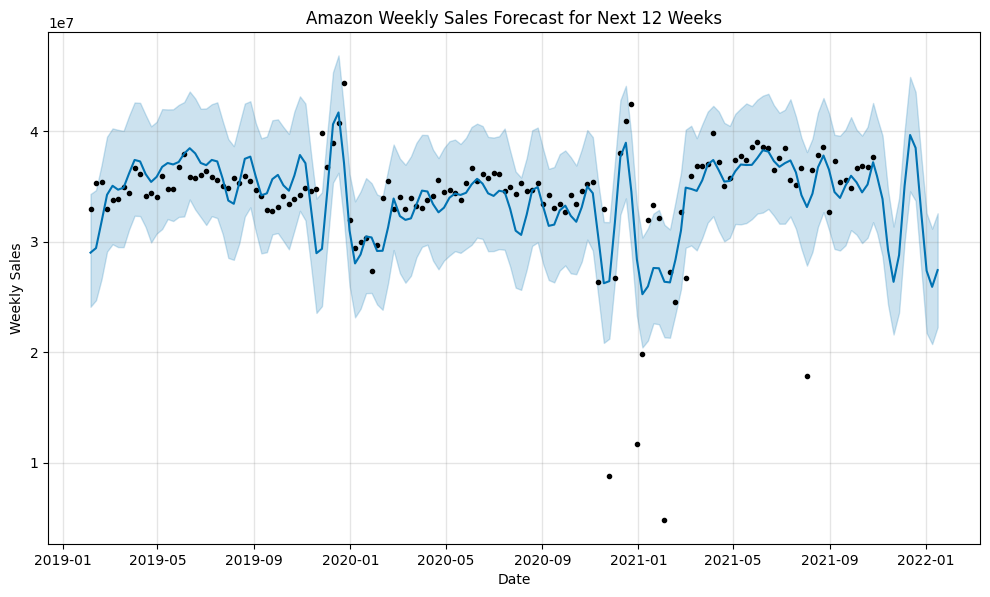

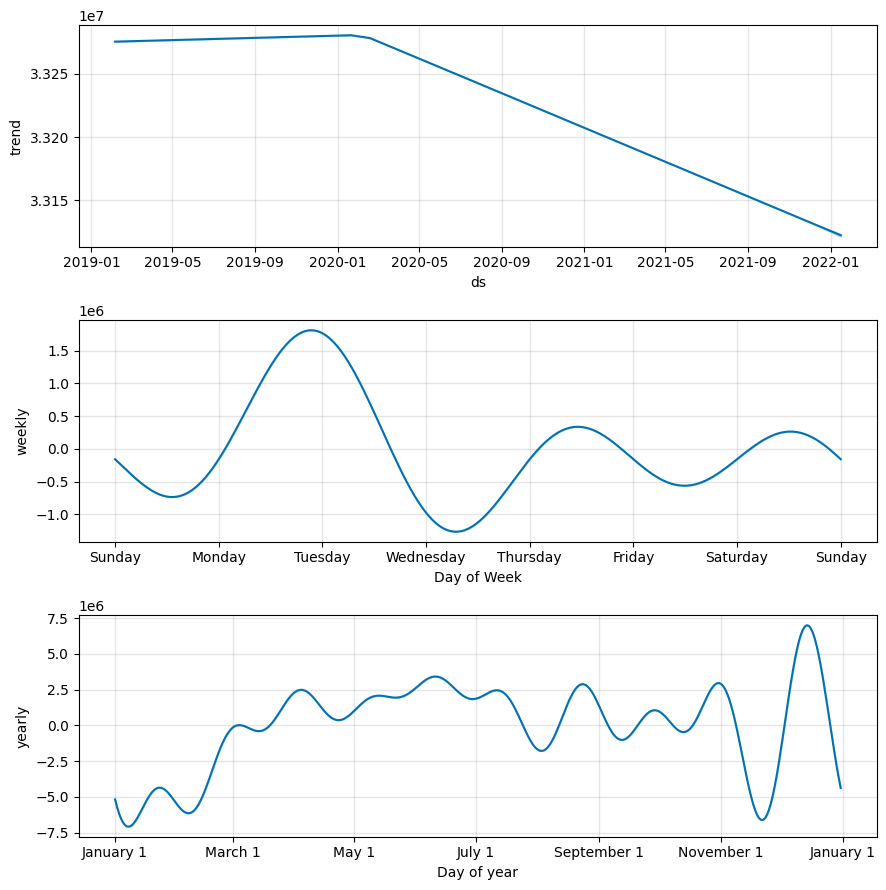

In [45]:

fig1 = model.plot(forecast)
plt.title("Amazon Weekly Sales Forecast for Next 12 Weeks")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
143,2021-10-31,3.594484e+07,3.081388e+07,4.125986e+07
144,2021-11-07,3.386899e+07,2.869239e+07,3.960987e+07
145,2021-11-14,2.923860e+07,2.431480e+07,3.468919e+07
146,2021-11-21,2.636947e+07,2.160045e+07,3.137278e+07
147,2021-11-28,2.878572e+07,2.357721e+07,3.394764e+07
148,2021-12-05,3.504439e+07,2.994361e+07,4.000998e+07
149,2021-12-12,3.966756e+07,3.456056e+07,4.492975e+07
150,2021-12-19,3.850033e+07,3.371484e+07,4.355839e+07
151,2021-12-26,3.274511e+07,2.770485e+07,3.788359e+07
152,2022-01-02,2.737385e+07,2.174287e+07,3.257295e+07


In [47]:
predicted_total = forecast.tail(12)['yhat'].sum()
print("Total Predicted Sales for Next 12 Weeks:", round(predicted_total, 2))


Total Predicted Sales for Next 12 Weeks: 380888513.51


## Sales are projected to increase slightly over the next 12 weeks.

# Seasonal trends show peaks around mid-year, likely during promotional events.

# Forecast confidence intervals remain stable, suggesting consistent sales behavior.